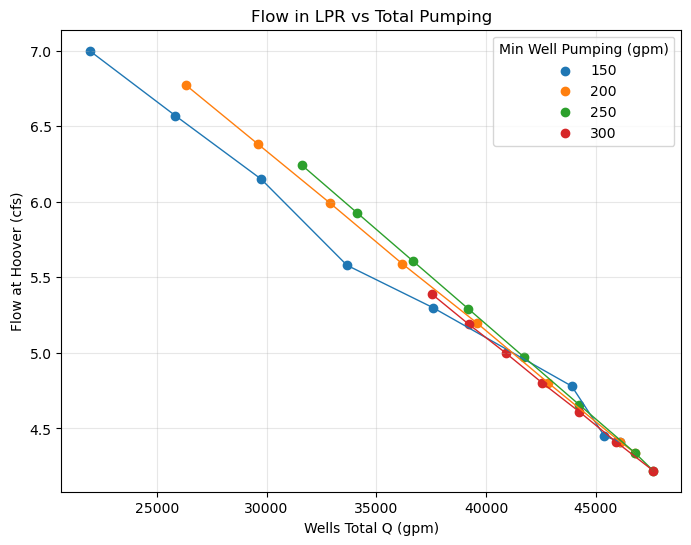

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean column headers (important with Excel/newlines)
df.columns = df.columns.str.strip()

xcol = "Wells Total Q (gpm)"
ycol = "8.6 (PRF @ Hoover) - total_depletion\n(cfs)\n*tells us how much water will be coming through the Hoover gage with that reduction"

groups = [
    (2, 9, "150"),
    (9, 16, "200"),
    (16, 23, "250"),
    (23, 30, "300"),
]

fig, ax = plt.subplots(figsize=(8, 6))

for start, end, label in groups:
    subset = df.iloc[start-1:end].copy()

    # Force numeric and remove anything that breaks lines
    subset[xcol] = pd.to_numeric(subset[xcol], errors="coerce")
    subset[ycol] = pd.to_numeric(subset[ycol], errors="coerce")
    subset = subset.dropna(subset=[xcol, ycol]).sort_values(xcol)

    x = subset[xcol].to_numpy(float)
    y = subset[ycol].to_numpy(float)

    # Extra safety: remove inf/-inf
    ok = np.isfinite(x) & np.isfinite(y)
    x, y = x[ok], y[ok]

    # One line per group, then points matching that exact color
    line, = ax.plot(x, y, linewidth=1)
    ax.scatter(x, y, color=line.get_color(), label=label)

ax.set_xlabel("Wells Total Q (gpm)")
ax.set_ylabel("Flow at Hoover (cfs)")
ax.set_title("Flow in LPR vs Total Pumping")
ax.legend(title="Min Well Pumping (gpm)")
ax.grid(True, alpha=0.3)
plt.show()
